Аналіз датасет bestsellers-with-categories.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*   Прочитайте csv файл (використовуйте функцію read_csv)

In [ ]:
data_file = pd.read_csv('bestsellers-with-categories.csv')
data_file

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


*   Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
data_file.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


*   Виведіть розміри датасету (використовуйте атрибут shape)

In [ ]:
data_file.shape

(550, 7)

*   Про скільки книг зберігає дані датасет?


**Відповідь**: 351

У таблиці 550 рядків, але унікальних елементів у колонці "Name" - 351

In [ ]:
num_unique_books = data_file['Name'].nunique()
num_unique_books

351

*   Зміна назв колонок

In [ ]:
data_file.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data_file.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

*   Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [ ]:
data_file.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

*   Чи є в якихось змінних пропуски?

**Відповідь:**  ні

*   Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [ ]:
unique_genre = data_file['genre'].unique()
unique_genre

array(['Non Fiction', 'Fiction'], dtype=object)

*   Які є унікальні жанри?

**Відповідь**: Non Fiction, Fiction

*   Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

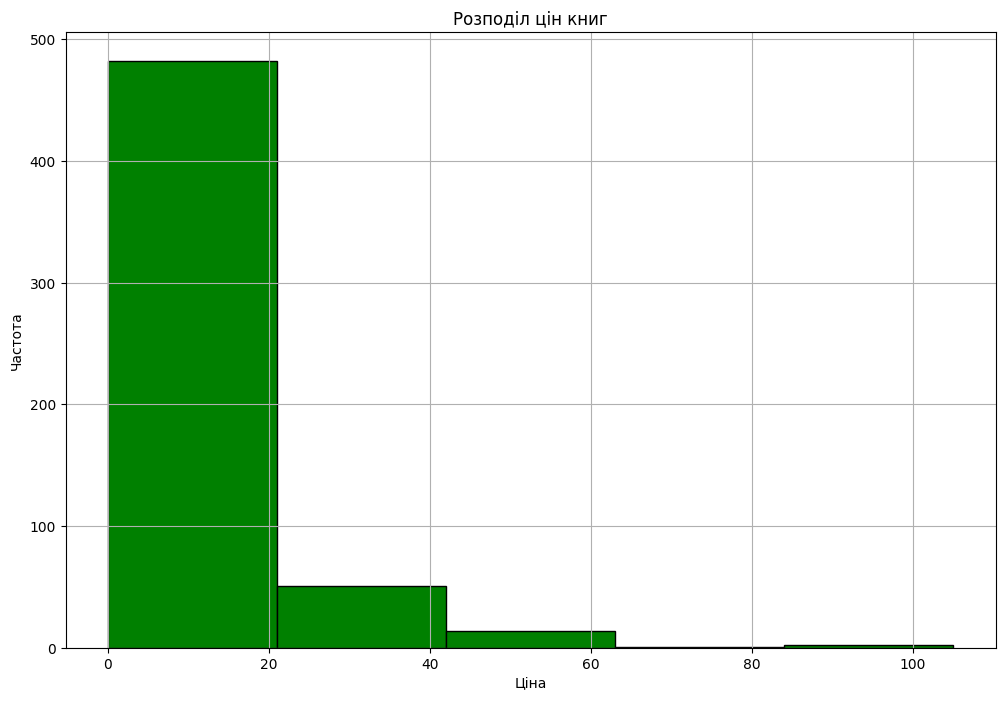

In [ ]:
plt.figure(figsize=(12, 8))


plt.hist(
    data_file['price'],
    bins=5, # кількість бінів (проміжків) для гістограми
    color=['green'] ,
    edgecolor='black'
)

plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін книг')
plt.grid(True)

plt.show()

*   Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [ ]:
prices = data_file.agg({
    'price': ['min', 'max', 'mean', 'median']
})
prices


,price
min,0.0
max,105.0
mean,13.1
median,11.0


- Максимальна ціна?
  Відповідь: 105.0
- Мінімальна ціна?
  Відповідь: 0.0
- Середня ціна?
  Відповідь:  13.1
- Медіанна ціна?
  Відповідь: 11.0

# Пошук та сортування даних

*   Який рейтинг у датасеті найвищий?  Відповідь: 4.9

In [ ]:
max_rating = data_file['user_rating'].max()
max_rating

4.9

*   Скільки книг мають такий рейтинг? Відповідь:  52

In [ ]:

rating_counts = (data_file['user_rating'] == max_rating).sum()
rating_counts

52

*   Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing 87841


In [ ]:
max_reviews = data_file['reviews'].max()
# max_reviews
id_max_reviews = data_file['reviews'].idxmax()
book_with_max_reviews = data_file.loc[id_max_reviews, 'name']
# book_with_max_reviews
print(book_with_max_reviews, max_reviews)

Where the Crawdads Sing 87841


*   З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 46 Publication Manual of the American Psychological Association, 6th Edition

In [ ]:
# Вибираємо 2015 рік
data2015 = data_file[data_file['year'] == 2015]

# Знаходимо максимальну ціну
max_price_data2015 = data2015['price'].max()

# Знаходимо книгу з максимальною ціною
id_max_price = data2015['price'].idxmax()
book_with_max_price2015 = data2015.loc[id_max_price, 'name']

print(max_price_data2015, book_with_max_price2015)

46 Publication Manual of the American Psychological Association, 6th Edition


*   Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [ ]:
count_fiction_2010 = data_file[(data_file['year'] == 2010) & (data_file['genre'] == 'Fiction')].shape[0]
count_fiction_2010

20

*   Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [ ]:
books_rating = data_file[(data_file['year'] == 2010) | (data_file['year'] == 2011)]
count_rating = books_rating[books_rating['user_rating'] == 4.9].shape[0]
count_rating




1

*   І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [ ]:
# Вибираємо дані для 2015 року та з ціною менше 8 доларів
data2015_filtered = data_file[(data_file['year'] == 2015) & (data_file['price'] < 8)]

# Сортуємо відфільтровані дані за ціною зростання
data2015_sorted = data2015_filtered.sort_values(by='price')
data2015_sorted

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


*   Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

# Агрегування даних та з'єднання таблиць

*   Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [ ]:
genre_price = data_file.groupby('genre').agg({
    'price': ['min', 'max']
})
genre_price

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

*   Максимальна ціна для жанру Fiction. Відповідь: 82
*   Мінімальна ціна для жанру Fiction. Відповідь : 0
*   Максимальна ціна для жанру Non Fiction. Відповідь: 105
*   Мінімальна ціна для жанру Non Fiction. Відповідь: 0

*   Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
# Обмежуємо DataFrame двома стовпцями: "name" (назва книги) і "author" (автор)
subset_data_file = data_file[["name", "author"]]

# Групуємо рядки за значенням стовпця "author", об'єднуючи всі книги одного автора разом
grouped_by_author = subset_data_file.groupby("author")

# Застосовуємо функцію агрегації "count", щоб підрахувати кількість книг для кожного автора
author_book_count = grouped_by_author.agg("count")

# Перейменовуємо стовпець з результатами підрахунку на "count" для ясності
author_book_count.columns = ["count"]


# Виводимо отриманий DataFrame, де для кожного автора вказана кількість його книг
author_book_count



                            count
author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]
Jeff Kinney 12


*   Якої розмірності вийшла таблиця? Відповідь: (248, 1)
*   Який автор має найбільше книг? Відповідь: Jeff Kinney
*   Скільки книг цього автора? Відповідь: 12

In [ ]:
author_book = author_book_count.sort_values(by='count')
author_book


,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11


*   Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
author_avg_rating = data_file[["author","user_rating"]].groupby("author").agg("mean").sort_values(by = "user_rating")
author_avg_rating

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


*   У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
*   Який у цього автора середній рейтинг? Відповідь: 3.9

*   З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [ ]:
# Об'єднання датафрейм по стовпцях
author_book_rating = pd.concat([author_book, author_avg_rating], axis=1)

# перейменування назв стовпців у датафреймі author_book_rating
author_book_rating.columns = ["count", "avg_rating"]

author_book_rating

,count,avg_rating
author,,
Jill Twiss,1,4.900000
Patrick Thorpe,1,4.900000
Ian K. Smith M.D.,1,4.100000
Howard Stern,1,4.300000
Hopscotch Girls,1,4.800000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


*   Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [ ]:
author_sort = author_book_rating.sort_values(['count','avg_rating'], ascending=True)
author_sort

,count,avg_rating
author,,
Muriel Barbery,1,4.000000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Chris Cleave,1,4.100000
Geneen Roth,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


*   Який автор перший у списку? Відповідь: Muriel Barbery

In [ ]:
author_sort.index[0]

'Muriel Barbery'

# Візуалізація

In [ ]:
data_file

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


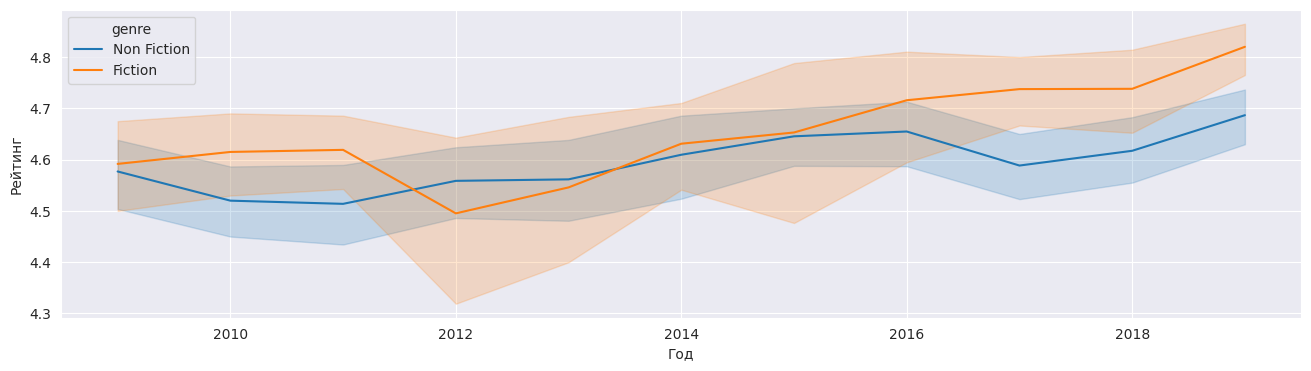

In [ ]:
plt.figure(figsize=(16,4))
sns.set_style("darkgrid")
sns.lineplot(data=data_file, x="year", y="user_rating", hue="genre")
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.show()

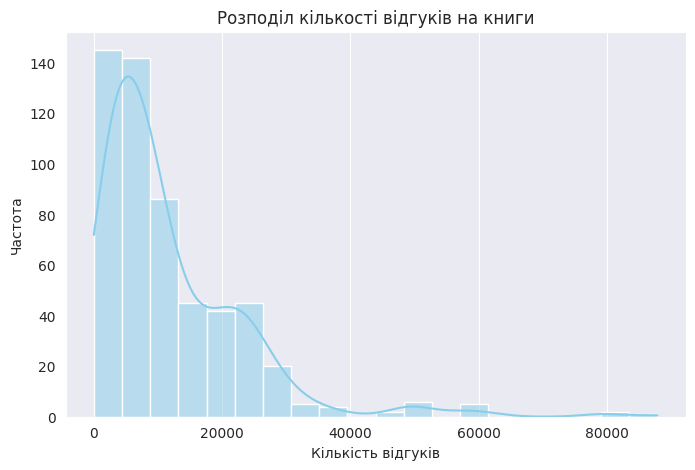

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data_file['reviews'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл кількості відгуків на книги')
plt.xlabel('Кількість відгуків')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

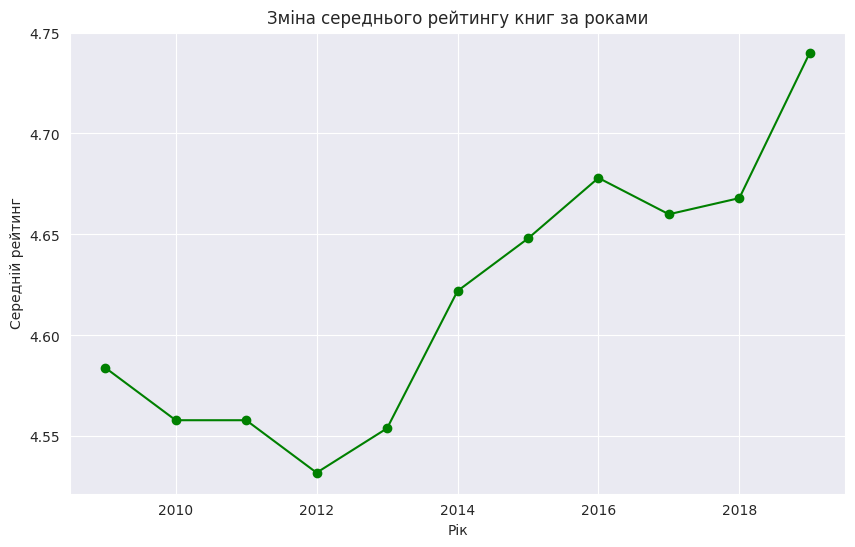

In [ ]:
avg_rating_by_year = data_file.groupby('year')['user_rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', linestyle='-', color='green')
plt.title('Зміна середнього рейтингу книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()

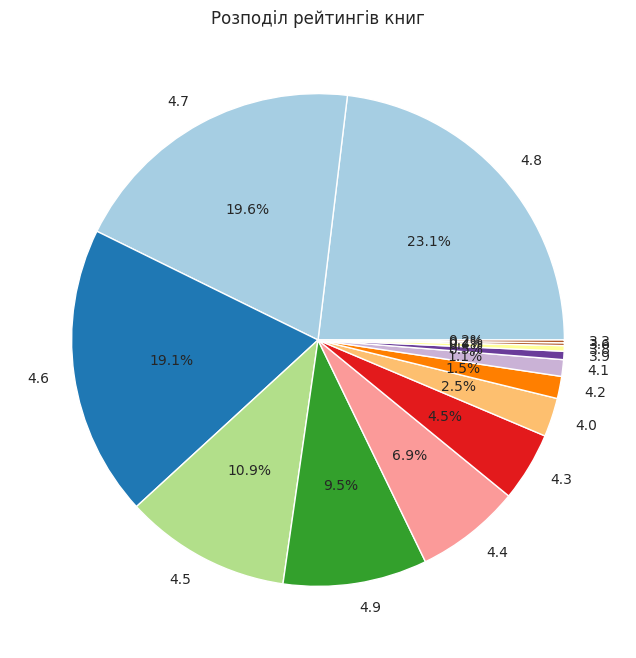

In [ ]:
plt.figure(figsize=(8, 8))
data_file['user_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Paired')
plt.title('Розподіл рейтингів книг')
plt.ylabel('')
plt.show()